In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"D:\data\retail_data.csv", index_col="Transaction_ID")
df.sample(n=2)

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
6154120.0,56350.0,Jason Banks,Danielle54@gmail.com,5.389146e+09,11919 Sarah Well,Chicago,Connecticut,32364.0,USA,34.0,...,220.748411,Grocery,Nestle,Chocolate,Average,Same-Day,Credit Card,Shipped,2.0,Chocolate-covered nuts
3309193.0,65832.0,Darrell Lynch,Angela61@gmail.com,2.936606e+09,88000 Murray Plains Apt. 896,Frankfurt,Berlin,36436.0,Germany,22.0,...,2413.693543,Electronics,Sony,Smartphone,Excellent,Standard,Credit Card,Delivered,5.0,Motorola Moto


查看数据基础信息

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302010 entries, 8691788.0 to 2882826.0
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       301702 non-null  float64
 1   Name              301628 non-null  object 
 2   Email             301663 non-null  object 
 3   Phone             301648 non-null  float64
 4   Address           301695 non-null  object 
 5   City              301762 non-null  object 
 6   State             301729 non-null  object 
 7   Zipcode           301670 non-null  float64
 8   Country           301739 non-null  object 
 9   Age               301837 non-null  float64
 10  Gender            301693 non-null  object 
 11  Income            301720 non-null  object 
 12  Customer_Segment  301795 non-null  object 
 13  Date              301651 non-null  object 
 14  Year              301660 non-null  float64
 15  Month             301737 non-null  object 
 16  Time          

In [4]:
df.describe()

,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [5]:
df.Email.unique

<bound method Series.unique of Transaction_ID
8691788.0           Ebony39@gmail.com
2174773.0            Mark36@gmail.com
6679610.0           Shane85@gmail.com
7232460.0            Mary34@gmail.com
4983775.0         Charles30@gmail.com
                       ...           
4246475.0        Courtney60@gmail.com
1197603.0        Jennifer71@gmail.com
7743242.0    Christopher100@gmail.com
9301950.0         Rebecca65@gmail.com
2882826.0         William14@gmail.com
Name: Email, Length: 302010, dtype: object>

In [6]:
df.nunique().tail(2)

Ratings       5
products    318
dtype: int64

In [7]:
df.value_counts().tail(2)

Customer_ID  Name           Email               Phone         Address                       City           State        Zipcode  Country  Age   Gender  Income  Customer_Segment  Date        Year    Month      Time      Total_Purchases  Amount      Total_Amount  Product_Category  Product_Brand  Product_Type  Feedback  Shipping_Method  Payment_Method  Order_Status  Ratings  products        
39991.0      Karen Morgan   Justin36@gmail.com  1.156532e+09  2787 Austin Street            San Francisco  Maine        49081.0  USA      26.0  Male    High    Regular           11/18/2023  2023.0  January    17:33:46  5.0              449.244100  2246.220500   Clothing          Zara           Dress         Average   Express          Credit Card     Delivered     2.0      Bodycon dress       1
99999.0      Michael Henry  Robert27@gmail.com  7.385454e+09  7820 Brendan Field Suite 657  Chicago        Connecticut  47409.0  USA      20.0  Male    Medium  Regular           09-02-23    2023.0  September  13

In [8]:
df.Email.value_counts()

Email
Michael59@gmail.com     93
Michael95@gmail.com     92
Michael17@gmail.com     90
Michael39@gmail.com     87
Michael50@gmail.com     84
                        ..
Gabriela89@gmail.com     1
Mike93@gmail.com         1
Cassie26@gmail.com       1
Ralph97@gmail.com        1
Madeline91@gmail.com     1
Name: count, Length: 52897, dtype: int64

筛选数据

In [41]:
df[(df.Email.str.contains("Michael59|Kenneth")) & (df.Total_Amount >= 64.0)].loc[:, "Name":"Age"].sample(2).reset_index()  # ['Name','Age']

,index,Name,Email,Phone,Address,City,State,Zipcode,Country,Age
0,169240,Thomas Thomas,Kenneth92@gmail.com,9.607546e+09,0101 Hall Expressway,Bielefeld,Berlin,1497.0,Germany,23.0
1,142913,Vanessa Berg,Kenneth59@gmail.com,9.636848e+09,50635 Smith Junction Suite 033,San Francisco,Maine,57763.0,USA,26.0


In [10]:
df[(df.Email.str.contains("Michael59|Kenneth")) | (df.Total_Amount >= 64.0)].loc[:, "Name":"Age"].sample(2)  # ['Name','Age']

,Name,Email,Phone,Address,City,State,Zipcode,Country,Age
Transaction_ID,,,,,,,,,
9815872.0,Lee Erickson,Lisa88@gmail.com,4.041664e+09,007 Mercer Course,Boston,Georgia,79129.0,USA,23.0
8569051.0,Heather Willis,Heather34@gmail.com,3.871790e+09,2085 Heather Loop Apt. 523,Chicago,Connecticut,6002.0,USA,34.0


In [11]:
df.query("Total_Amount>2*Amount>600").sample(n=3)  # 直接写SQL wherer语句

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
7277969.0,11641.0,Vanessa Carter,Robert84@gmail.com,3.331127e+09,3281 Christine Plaza,Dortmund,Berlin,61530.0,Germany,47.0,...,3580.458511,Electronics,Apple,Laptop,Excellent,Standard,Debit Card,Shipped,5.0,HP Spectre
8025585.0,87937.0,Jennifer Grimes,Teresa10@gmail.com,2.338973e+09,4641 Mitchell Locks Apt. 707,Frankfurt,Berlin,98036.0,Germany,22.0,...,2806.767514,Electronics,Samsung,Television,Average,Express,Cash,Delivered,2.0,QLED TV
6218220.0,92716.0,Jocelyn Greer,Christina86@gmail.com,7.926749e+09,1574 Brown Stravenue,Southampton,England,29274.0,UK,46.0,...,3863.691014,Books,HarperCollins,Thriller,Excellent,Same-Day,Debit Card,Shipped,5.0,Psychological thriller


In [12]:
a = df.Amount.mean()
# df.query('Total_Amount>10*@a+60') # @符号后面引入变量
df[df.eval("Total_Amount>10*@a+60")].sample(2)

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
7558062.0,40700.0,Kristin Knox,Sydney63@gmail.com,9.801197e+09,2056 Contreras Roads Apt. 229,Denver,New York,10487.0,USA,38.0,...,3562.564026,Books,HarperCollins,Non-Fiction,Good,Express,PayPal,Shipped,4.0,Health
4550623.0,95336.0,Kimberly Wang,Rachel76@gmail.com,6.634634e+09,48428 Ana Locks Suite 964,Perth,New South Wales,35764.0,Australia,49.0,...,3011.038334,Books,HarperCollins,Non-Fiction,Average,Same-Day,Debit Card,Delivered,2.0,Cooking


In [13]:
df.loc[:, lambda x: x.columns.str.len() <= 5]
df.filter(regex="E|T", axis=1).filter(like="_").sample(2)

,Total_Purchases,Total_Amount,Product_Type
Transaction_ID,,,
9278369.0,8.0,2667.677358,Water
8247248.0,3.0,165.524606,Shirt


In [14]:
df.select_dtypes(include="object").sample(
    3
)  # df.select_dtypes(exclude=['object','int'])

,Name,Email,Address,City,State,Country,Gender,Income,Customer_Segment,Date,Month,Time,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,products
Transaction_ID,,,,,,,,,,,,,,,,,,,,
6735782.0,Kristen Sanford,Tyler24@gmail.com,052 Jones Fords Apt. 291,San Francisco,Maine,USA,Male,High,Regular,12/16/2023,January,7:38:27,Grocery,Nestle,Snacks,Excellent,Express,Cash,Shipped,Nuts
9009235.0,Crystal Taylor,Kristen79@gmail.com,041 Russo Mount,Manchester,England,UK,Female,Low,New,12-11-23,December,22:28:37,Home Decor,Home Depot,Furniture,Excellent,Express,Debit Card,Shipped,TV stand
5496743.0,Tracy Hodges,Adam100@gmail.com,537 Thompson Wall,Toronto,Ontario,Canada,Male,Medium,New,6/13/2023,June,4:44:33,Grocery,Coca-Cola,Water,Excellent,Express,Credit Card,Shipped,Mineral water


In [15]:
df[df.Email == "Michael59@gmail.com"].sample(2)

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1890573.0,82038.0,William Garner,Michael59@gmail.com,1.531862e+09,80081 Christopher Route,Brighton,England,98711.0,UK,44.0,...,3263.921192,Books,Penguin Books,Non-Fiction,Average,Same-Day,Cash,Delivered,2.0,Memoir
5883392.0,47506.0,Susan Palmer,Michael59@gmail.com,6.847728e+09,5424 Caitlin Drive Suite 107,Wuppertal,Berlin,59936.0,Germany,22.0,...,1627.630826,Electronics,Samsung,Tablet,Average,Same-Day,Credit Card,Delivered,2.0,Microsoft Surface


In [16]:
# df[df.Customer_ID.isna()]
df.Customer_ID.fillna(0, inplace=True)
df[df.Customer_ID.isna()]
df.Customer_ID = df.Customer_ID.astype("int64")
df.sample(2)

,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
7554763.0,39642,Edwin Hanson,Kimberly88@gmail.com,3.828366e+09,9371 David Prairie Apt. 049,Quebec City,Ontario,32563.0,Canada,49.0,...,2318.472085,Electronics,Sony,Smartphone,Excellent,Same-Day,PayPal,Pending,5.0,Motorola Moto
3727159.0,70029,Madison Nelson,Brandon58@gmail.com,3.635045e+09,6595 Carey Pike,San Francisco,Maine,89513.0,USA,26.0,...,1311.108419,Home Decor,IKEA,Furniture,Bad,Express,Credit Card,Delivered,1.0,Dining table


In [17]:
df.set_index("Email").index.has_duplicates  # 是否有重复值

True

In [18]:
df.reset_index(inplace=True)

In [19]:
df.City.value_counts()

City
Chicago          21652
Portsmouth       20131
San Francisco    12188
Frankfurt        10182
Boston            9416
                 ...  
Charlotte          862
Denver             856
Arlington          856
Philadelphia       840
San Diego          833
Name: count, Length: 130, dtype: int64

函数应用

In [20]:
# pipe():应用在整个DataFrame或者Series
# apply():应用在DataFrame的行（默认）或者列
# applymap():应用在DataFrame所有元素
# map():应用在DataFrame的一列或者Series的每个元素
# agg():指定轴一项或者多项操作进行汇总
df.agg(a=('Amount',max),min=('Amount',min))
df.groupby('Email').agg({'Amount':[min,max],'Total_Amount':[np.mean,np.std]}).sample(2)

Amount             Total_Amount             
                            min         max         mean          std
Email                                                                
Melissa73@gmail.com   84.880807  492.598057  1763.839287  1032.395836
Ruth91@gmail.com     379.461622  461.587588  2456.605768  2400.885651

In [21]:
df.sample(2)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
97968,9490901.0,87339,Melanie Davis,Courtney51@gmail.com,5.901912e+09,158 Schmidt Grove,Toronto,Ontario,81609.0,Canada,...,3298.653482,Electronics,Samsung,Tablet,Average,Same-Day,Credit Card,Shipped,2.0,Amazon Fire Tablet
266500,6422834.0,62608,Alicia Knox,David4@gmail.com,5.515077e+09,905 Tony Landing,Edinburgh,England,53009.0,UK,...,2975.797506,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Excellent,Same-Day,Credit Card,Delivered,5.0,Air conditioner


In [22]:
df.dtypes

Transaction_ID      float64
Customer_ID           int64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object

In [23]:
# df.groupby().sum()
# df[df.Email.isna()]
df.Email.fillna('0',inplace=True)
df.groupby(df.Email.apply(lambda x:x.split('@')[0])).agg({'Amount':[sum,max,min,np.std],'Total_Amount':[max,min,np.std]}).sample(3)

Amount                                     Total_Amount  \
                     sum         max         min         std          max   
Email                                                                       
Manuel96      920.797210  498.744508  127.373905  185.988291  3491.211555   
Christina25  3596.818852  494.014564   30.468151  149.903852  3913.660304   
Caroline51    457.190401  357.571985   99.618416  182.400718  1787.859925   

                                       
                     min          std  
Email                                  
Manuel96     1018.991238  1383.535597  
Christina25   119.213825  1186.475025  
Caroline51    597.710497   841.562731

In [24]:
df.Email.apply(lambda x:x.split('@')[0])

0                Ebony39
1                 Mark36
2                Shane85
3                 Mary34
4              Charles30
               ...      
302005        Courtney60
302006        Jennifer71
302007    Christopher100
302008         Rebecca65
302009         William14
Name: Email, Length: 302010, dtype: object

In [25]:
df.Email.str.split('@',expand=True)

,0,1
0,Ebony39,gmail.com
1,Mark36,gmail.com
2,Shane85,gmail.com
3,Mary34,gmail.com
4,Charles30,gmail.com
...,...,...
302005,Courtney60,gmail.com
302006,Jennifer71,gmail.com
302007,Christopher100,gmail.com
302008,Rebecca65,gmail.com


In [26]:
df.Total_Amount.groupby(pd.qcut(df.Total_Amount,q=2)).agg([sum,np.mean])

,sum,mean
Total_Amount,,
"(10.003, 1041.118]",7.203330e+07,477.579410
"(1041.118, 4999.626]",3.405323e+08,2257.722901


In [27]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,302010.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,54950.456392,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26051.641549,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,0.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32401.000000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,54963.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77489.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [28]:
df[df.Transaction_ID.isnull()].tail(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
300351,NaN,64777,Hannah Jones DDS,Charles91@gmail.com,6.617423e+09,726 David Ranch Suite 108,Munich,Berlin,92588.0,Germany,...,1251.458862,Grocery,Coca-Cola,Juice,Bad,Express,Credit Card,Pending,1.0,Grapefruit juice
301037,NaN,85591,James Marks,Michael75@gmail.com,2.827519e+09,72381 Montgomery Port Apt. 474,Kelowna,Ontario,9559.0,Canada,...,618.384993,Grocery,Coca-Cola,Water,Average,Same-Day,Cash,Processing,2.0,Artesian water
301177,NaN,91391,Jacqueline Peters,Rachel25@gmail.com,6.895461e+09,6000 Gomez Radial,Ottawa,Ontario,26325.0,Canada,...,232.594615,Clothing,Zara,Shirt,Excellent,Express,Cash,Delivered,5.0,Sweatshirt


In [29]:
df.Transaction_ID.fillna(0, inplace=True)

In [30]:
# df.Transaction_ID.astype("int64")
df.sample(2)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
194552,6768295.0,68934,Derrick Erickson,Benjamin31@gmail.com,1.533098e+09,9215 Daniels Summit,Austin,New Jersey,7517.0,NaN,...,473.260313,Clothing,Nike,T-shirt,Good,Standard,Debit Card,Shipped,3.0,V-neck tee
244522,6225653.0,98115,Drew Campbell,Mary43@gmail.com,9.585876e+09,0989 Brian Stravenue,Leeds,England,86427.0,UK,...,243.227551,Electronics,Apple,Laptop,Good,Express,Credit Card,Processing,3.0,Samsung Notebook


In [31]:
df[df.Email.str.count('@')>=1].sample(2)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
297528,7973841.0,71399,Adam Moore,Tracy58@gmail.com,5.896164e+09,1379 Schneider Glen,Belfast,England,63736.0,UK,...,929.288283,Books,HarperCollins,Non-Fiction,Average,Express,Credit Card,Delivered,2.0,Cooking
37727,1075713.0,26560,Jacqueline Lee,Justin67@gmail.com,6.152276e+09,857 Davis Lake Suite 690,Leeds,England,80359.0,UK,...,586.767178,Home Decor,Bed Bath & Beyond,Bathroom,Excellent,Standard,Cash,Delivered,5.0,Sink


In [32]:
def fill_num(value,fill_value):
    if value[-3]=='-':        
        return ''.join((value[:-2],fill_value,value[-2:]))
    else :
        return value

In [33]:
df.Date[1]

'12/31/2023'

In [34]:
df.Date[1][-2:]

'23'

In [35]:
pd.to_datetime(
    df.Date.str.replace("/", "-")
    .fillna(method='pad',axis=0)
    .apply(fill_num,args=('20',))    
).dt.day_name()

0            Monday
1            Sunday
2         Wednesday
3            Monday
4         Wednesday
            ...    
302005     Saturday
302006     Thursday
302007      Tuesday
302008       Sunday
302009       Monday
Name: Date, Length: 302010, dtype: object

In [36]:
pd.to_datetime(
    df.Date.str.replace("/", "-")
    .fillna(method='pad',axis=0)
    .apply(fill_num,args=('20',))    
).dt.day_name().sample(2)

9114      Sunday
221477    Sunday
Name: Date, dtype: object

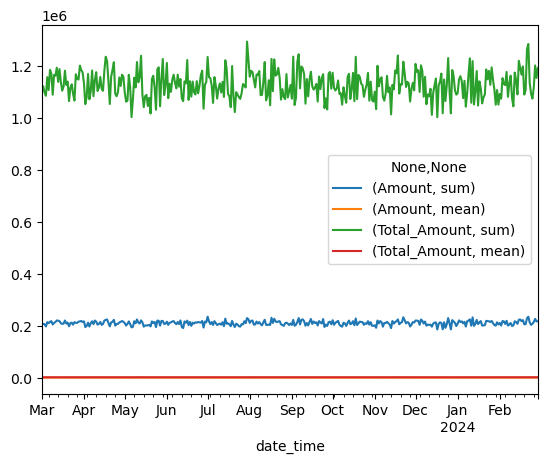

In [37]:
(
    df
    .assign(date_time=pd.to_datetime(df.Date.str.replace("/", "-")
    .fillna(method='pad',axis=0)
    .apply(fill_num,args=('20',))))
    .set_index('date_time')
    .loc[:,['Amount','Total_Amount']]
    .resample('D')
    .agg((sum,np.mean))
    .plot()
);

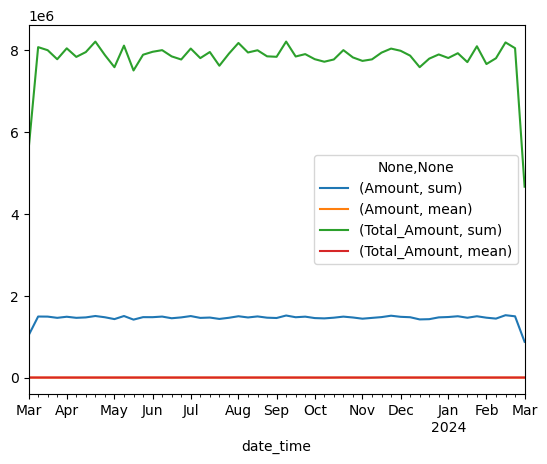

In [38]:
(
    df
    .assign(date_time=pd.to_datetime(df.Date.str.replace("/", "-")
    .fillna(method='pad',axis=0)
    .apply(fill_num,args=('20',))))
    .set_index('date_time')
    .loc[:,['Amount','Total_Amount']]
    .resample('W')
    .agg((sum,np.mean))
    .plot()
);

In [39]:
(
    df.Date.str.replace("/", "-")
    .fillna(method='pad',axis=0)
    .apply(lambda x:'20'+x if x[-3]=='/' else x) 
).sample(2)

66266    9-27-2023
69133    5-23-2023
Name: Date, dtype: object

In [40]:
df.dtypes

Transaction_ID      float64
Customer_ID           int64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object